***MOUNTING GOOGLE DRIVE FOR IMPORTING THE DATASET***

In [94]:
import pandas as pd
from google.colab import drive
drive.mount('/content/Drive/', force_remount = True)
MyDataFrame = pd.read_csv('/content/Drive/MyDrive/AML_1104/Term_Project/UCI_Adult_Dataset.csv', header = 0)

Mounted at /content/Drive/


***IMPORTING THE REQUIRED LIBRARIES***

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

***DEFINING THE COLUMN NAMES FOR THE DATAFRAME***

In [96]:
MyDataFrame.columns = ['Age','Work Class','Final Weight','Education','Education Number','Marital Status','Occupation','Relationship','Race','Gender','Capital Gain','Capital Loss','Hours Per Week','Native Country','Salary']

***CHECKING FOR NULL VALUES ('?') IN THE RESPECTIVE COLUMNS***

In [97]:
MyDataFrame.isin(['?']).sum(axis=0)

Age                    0
Work Class          2799
Final Weight           0
Education              0
Education Number       0
Marital Status         0
Occupation          2809
Relationship           0
Race                   0
Gender                 0
Capital Gain           0
Capital Loss           0
Hours Per Week         0
Native Country       857
Salary                 0
dtype: int64

***COUNTING THE FREQUENCY OF EACH ENTRY IN THE 'WORK CLASS' COLUMN***

In [98]:
MyDataFrame['Work Class'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: Work Class, dtype: int64

***COUNTING THE FREQUENCY OF EACH ENTRY IN THE 'OCCUPATION' COLUMN***

In [99]:
MyDataFrame['Occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: Occupation, dtype: int64

***COUNTING THE FREQUENCY OF EACH ENTRY IN THE 'NATIVE COUNTRY' COLUMN***

In [100]:
MyDataFrame['Native Country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                        

***REPLACING THE '?' VALUES WITH SPECIFIC VALUES TO AVOID MISSING DATA PROBLEMS***

In [101]:
MyDataFrame['Occupation'] = MyDataFrame['Occupation'].replace('?','Prof-specialty')

In [102]:
MyDataFrame['Work Class'] = MyDataFrame['Work Class'].replace('?','Private')

In [103]:
MyDataFrame['Native Country'] = MyDataFrame['Native Country'].replace('?','United-States')

***NO NULL VALUE ('?') PRESENT***

In [104]:
MyDataFrame.isin(['?']).sum()

Age                 0
Work Class          0
Final Weight        0
Education           0
Education Number    0
Marital Status      0
Occupation          0
Relationship        0
Race                0
Gender              0
Capital Gain        0
Capital Loss        0
Hours Per Week      0
Native Country      0
Salary              0
dtype: int64

***NUMERICAL COLUMNS DEFINED***

In [105]:
numerical_columns = MyDataFrame[['Age', 'Final Weight', 'Education Number', 'Capital Gain', 'Capital Loss', 'Hours Per Week']]

***CATEGORICAL COLUMNS DEFINED***

In [106]:
categorical_columns = MyDataFrame[['Work Class', 'Education', 'Marital Status', 'Occupation', 'Relationship',
       'Race', 'Gender', 'Native Country', 'Salary']]

***HEATMAP FOR THE NUMERICAL COLUMNS***

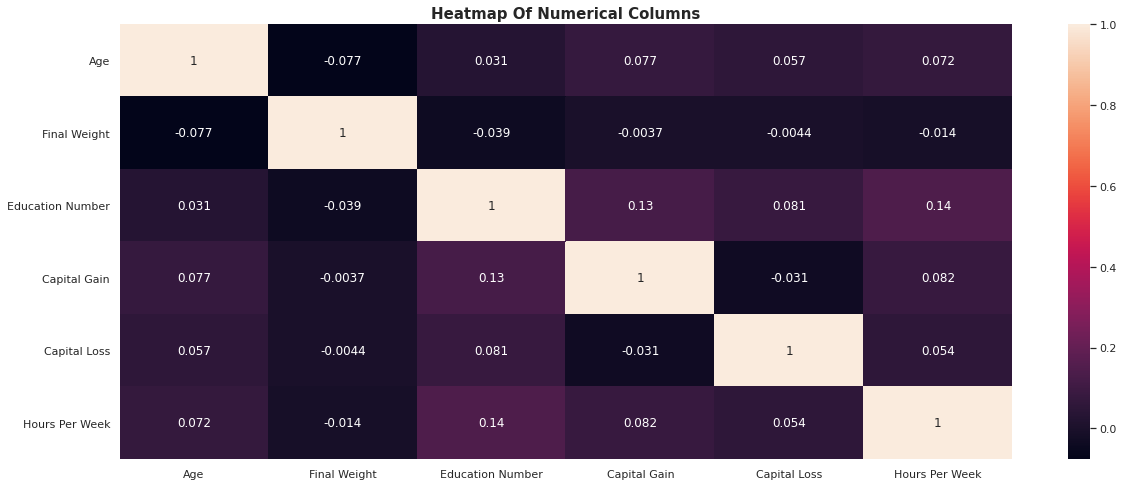

In [107]:
sb.heatmap(numerical_columns.corr(), annot=True)
plt.title('Heatmap Of Numerical Columns', fontsize=15, fontweight='bold')
plt.show()

***EXPLORATORY DATA ANALYSIS***

Miniumum Age: 17
Maximum Age: 90


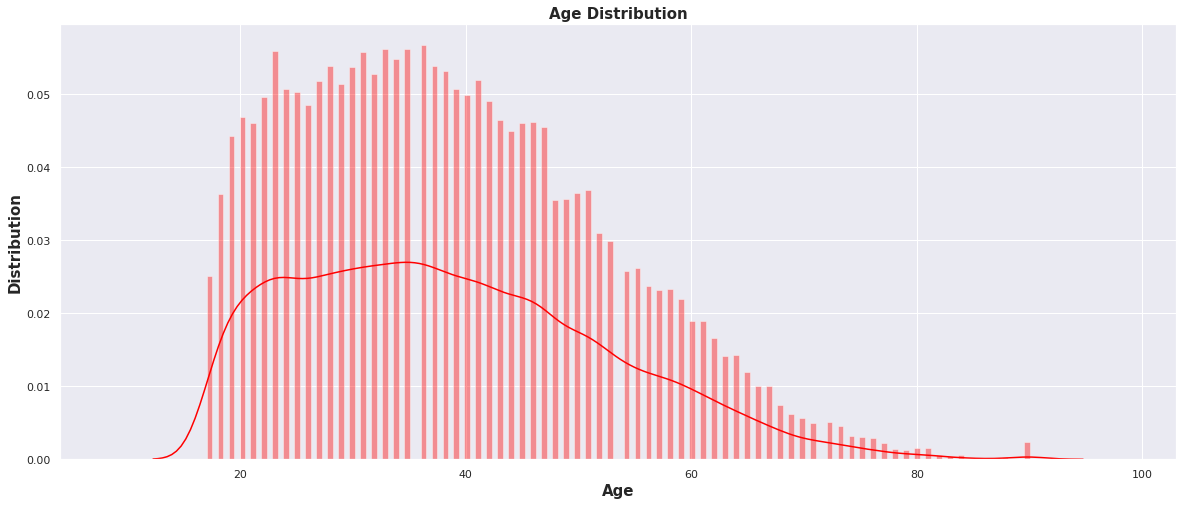

In [108]:
print('Miniumum Age:', MyDataFrame['Age'].min())
print('Maximum Age:', MyDataFrame['Age'].max())
plt.rcParams['figure.figsize'] = [20, 8]
sb.set(style='darkgrid')
sb.distplot(MyDataFrame['Age'], bins=150, color='red')
plt.ylabel("Distribution", fontsize=15, fontweight='bold')
plt.xlabel("Age", fontsize=15, fontweight='bold')
plt.margins(x=0.1)
plt.title('Age Distribution', fontsize=15, fontweight='bold')
plt.show()

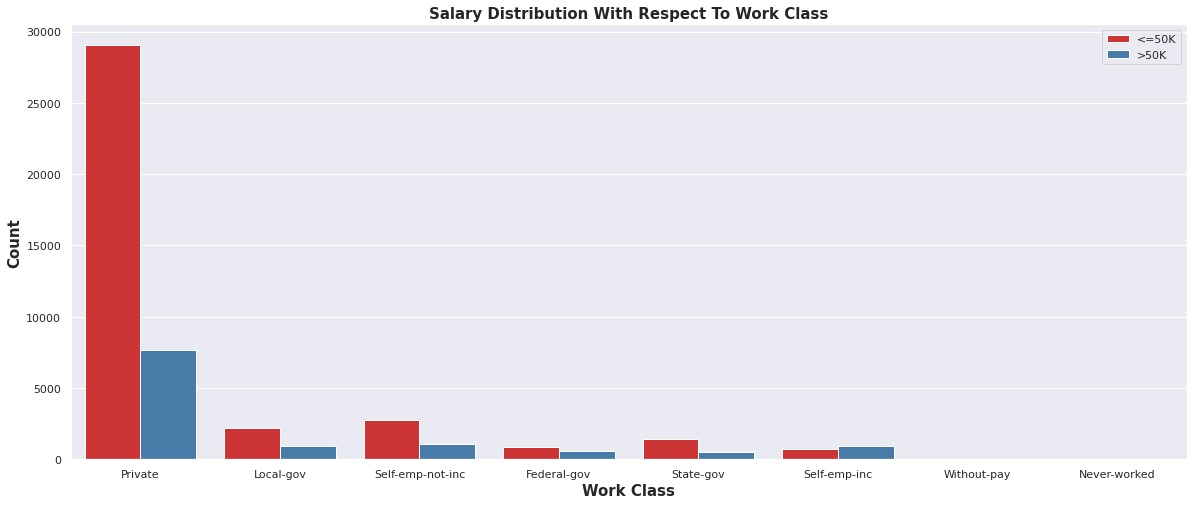

In [109]:
plt.figure(figsize=(20,8))
sb.countplot(x=MyDataFrame['Work Class'], hue=MyDataFrame['Salary'], palette='Set1')
plt.legend(loc='upper right')
plt.ylabel('Count', fontsize=15, fontweight='bold')
plt.xlabel('Work Class', fontsize=15, fontweight='bold')
plt.title('Salary Distribution With Respect To Work Class', fontsize=15, fontweight='bold')
plt.show()

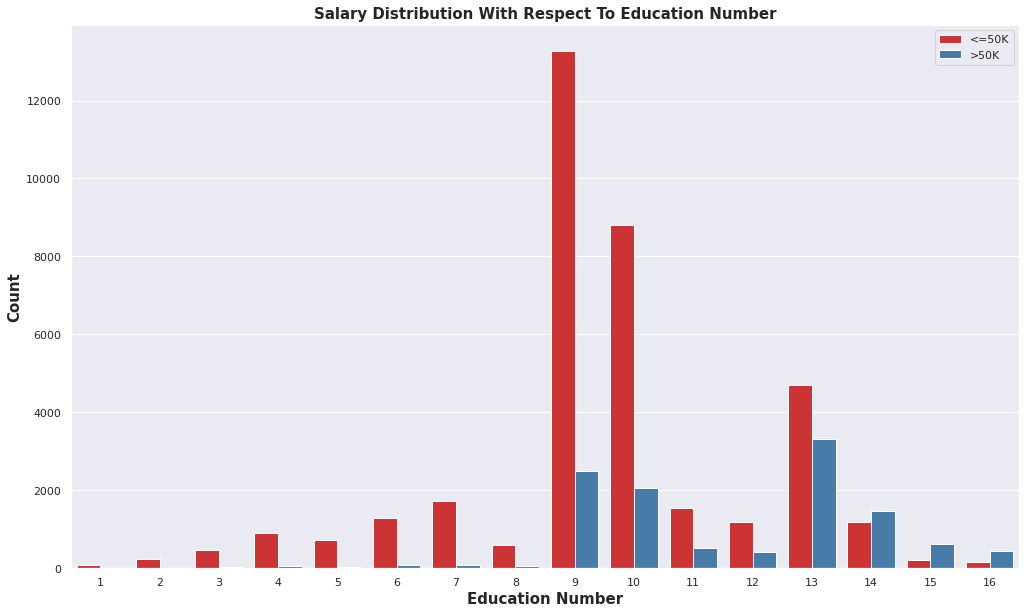

In [110]:
plt.figure(figsize=(17,10))
sb.countplot(MyDataFrame['Education Number'], hue=MyDataFrame['Salary'], palette='Set1')
plt.legend(loc='upper right')
plt.ylabel('Count', fontsize=15, fontweight='bold')
plt.xlabel('Education Number', fontsize=15, fontweight='bold')
plt.title('Salary Distribution With Respect To Education Number', fontsize=15, fontweight='bold')
plt.show()

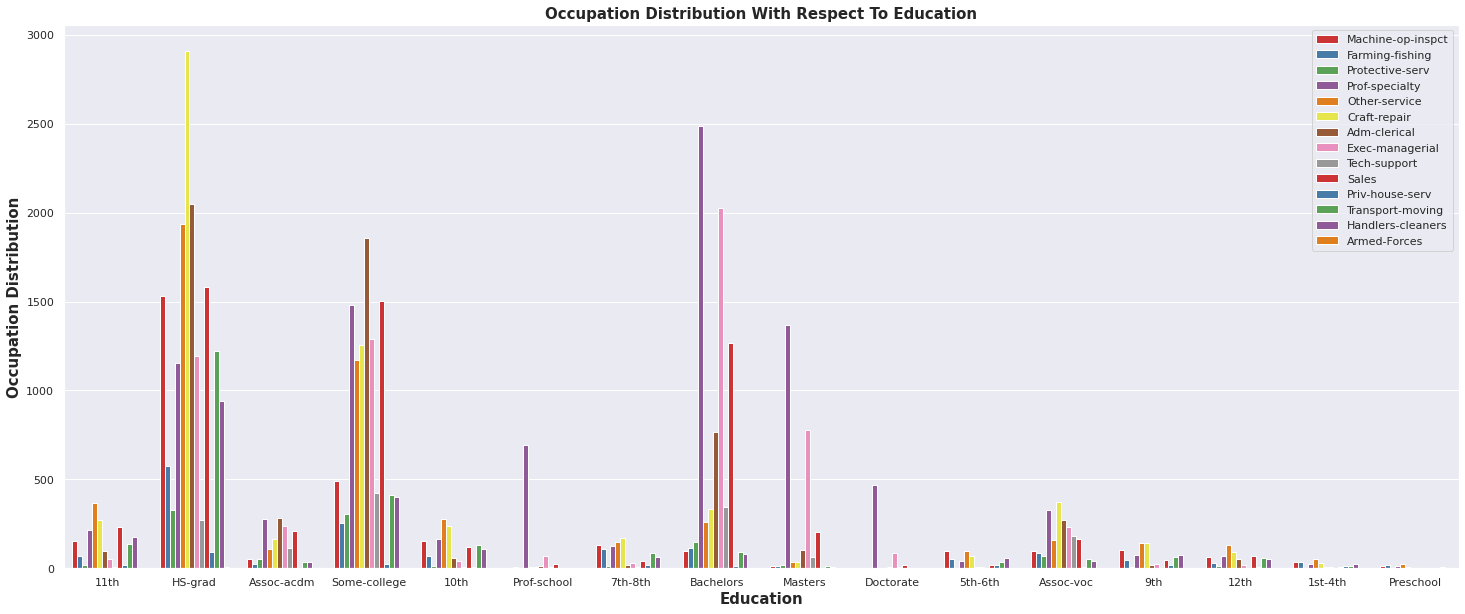

In [111]:
plt.figure(figsize=(25,10))
ax = sb.countplot(MyDataFrame['Education'], hue=MyDataFrame['Occupation'], palette="Set1")
plt.legend(loc='upper right')
plt.ylabel('Occupation Distribution', fontsize=15, fontweight='bold')
plt.xlabel('Education', fontsize=15, fontweight='bold')
plt.title('Occupation Distribution With Respect To Education', fontsize=15, fontweight='bold')
plt.show()

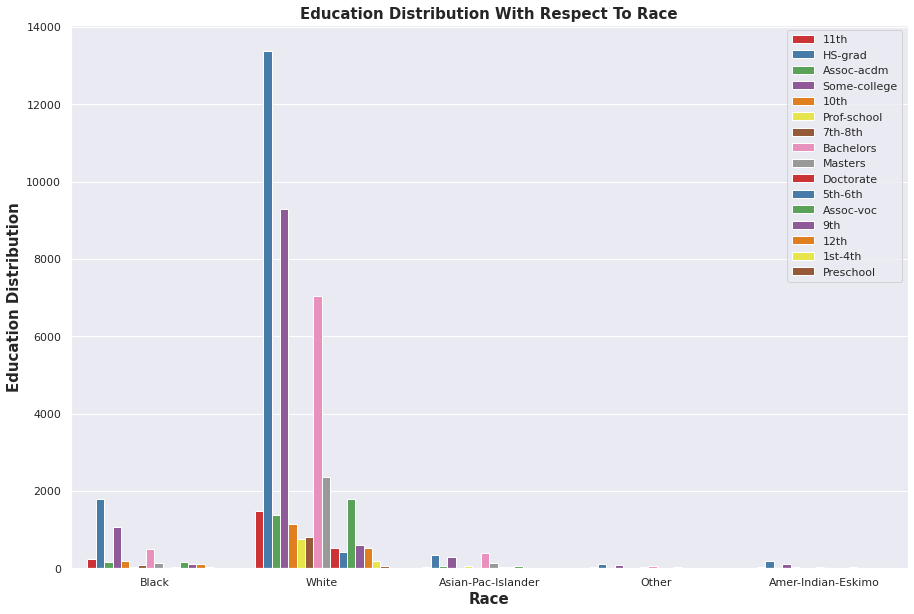

In [112]:
plt.figure(figsize=(15,10))
ax = sb.countplot(MyDataFrame['Race'], hue=MyDataFrame['Education'], palette="Set1")
plt.legend(loc='upper right')
plt.ylabel('Education Distribution', fontsize=15, fontweight='bold')
plt.xlabel('Race', fontsize=15, fontweight='bold')
plt.title('Education Distribution With Respect To Race', fontsize=15, fontweight='bold')
plt.show()

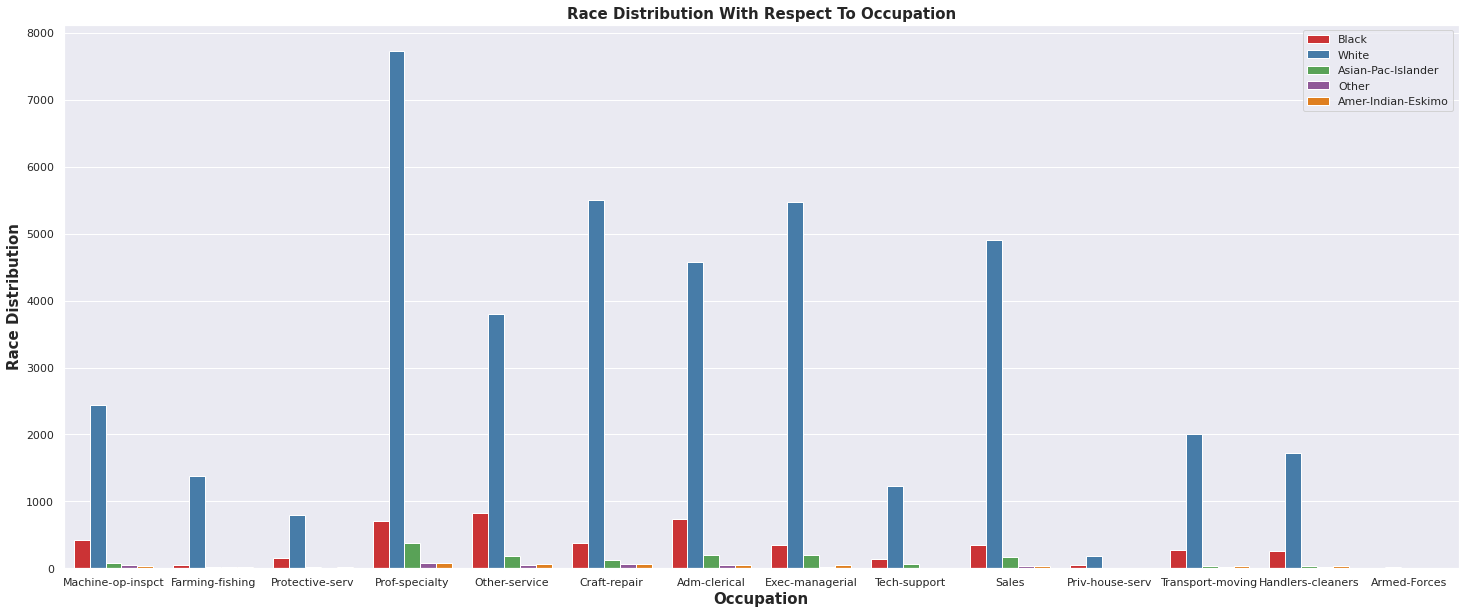

In [113]:
plt.figure(figsize=(25,10))
ax = sb.countplot(MyDataFrame['Occupation'], hue=MyDataFrame['Race'], palette="Set1")
plt.legend(loc='upper right')
plt.ylabel('Race Distribution', fontsize=15, fontweight='bold')
plt.xlabel('Occupation', fontsize=15, fontweight='bold')
plt.title('Race Distribution With Respect To Occupation', fontsize=15, fontweight='bold')
plt.show()

Male      66.848204
Female    33.151796
Name: Gender, dtype: float64


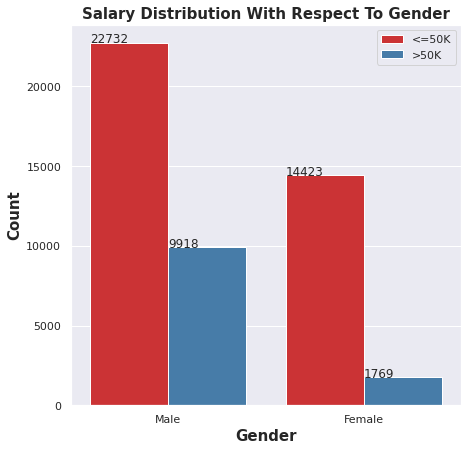

In [114]:
print(MyDataFrame['Gender'].value_counts()/MyDataFrame['Gender'].count()*100)

plt.figure(figsize=(7,7))
ax = sb.countplot(MyDataFrame['Gender'], hue=MyDataFrame['Salary'], palette="Set1")
plt.legend(loc='upper right')
plt.ylabel('Count', fontsize=15, fontweight='bold')
plt.xlabel('Gender', fontsize=15, fontweight='bold')
plt.title('Salary Distribution With Respect To Gender', fontsize=15, fontweight='bold')


for p in ax.patches:
    txt = str(p.get_height())
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax.text(txt_x,txt_y,txt)

plt.show()

Married-civ-spouse       45.819172
Never-married            32.998239
Divorced                 13.580525
Separated                 3.132550
Widowed                   3.107981
Married-spouse-absent     1.285779
Married-AF-spouse         0.075754
Name: Marital Status, dtype: float64


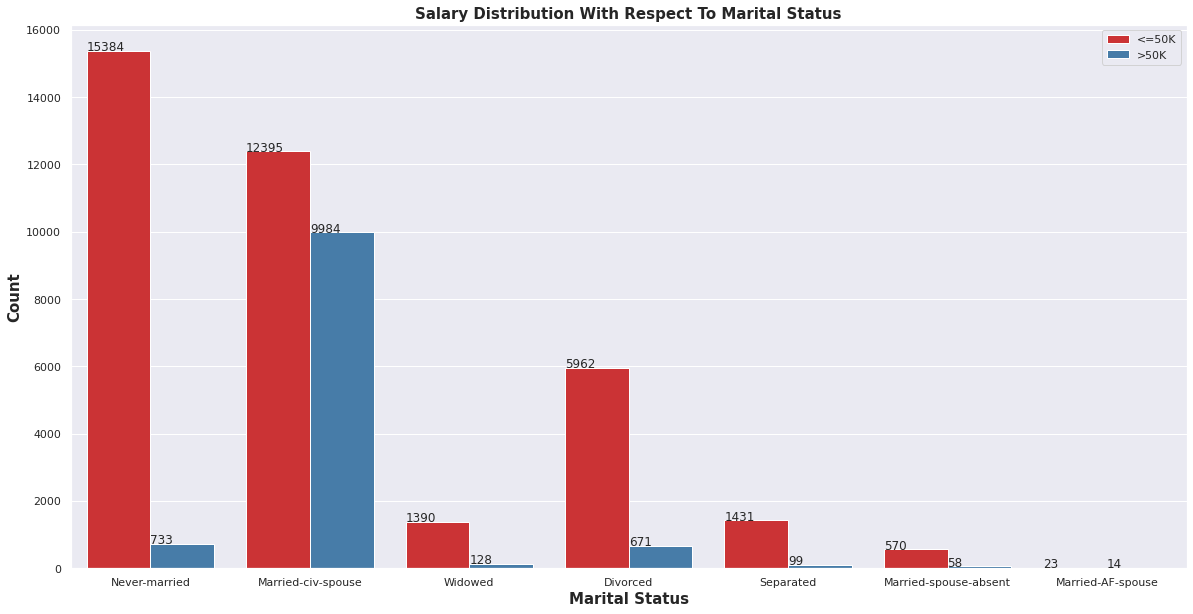

In [115]:
print(MyDataFrame['Marital Status'].value_counts()/MyDataFrame['Marital Status'].count()*100)

plt.figure(figsize=(20,10))
ax = sb.countplot(MyDataFrame['Marital Status'], hue=MyDataFrame['Salary'], palette="Set1")
plt.legend(loc='upper right')
plt.ylabel('Count', fontsize=15, fontweight='bold')
plt.xlabel('Marital Status', fontsize=15, fontweight='bold')
plt.title('Salary Distribution With Respect To Marital Status', fontsize=15, fontweight='bold')


for p in ax.patches:
    txt = str(p.get_height())
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax.text(txt_x,txt_y,txt)

Husband           40.366897
Not-in-family     25.762663
Own-child         15.521477
Unmarried         10.493018
Wife               4.772532
Other-relative     3.083412
Name: Relationship, dtype: float64


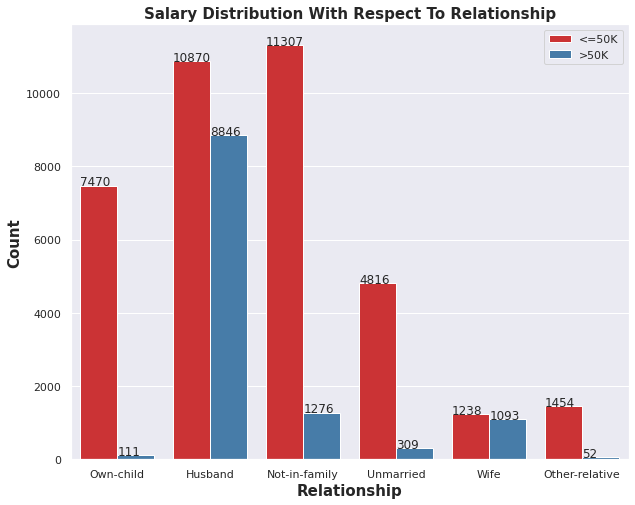

In [116]:
print(MyDataFrame['Relationship'].value_counts()/MyDataFrame['Relationship'].count()*100)

plt.figure(figsize=(10,8))
ax = sb.countplot(MyDataFrame['Relationship'], hue=MyDataFrame['Salary'], palette="Set1")
plt.legend(loc='upper right')
plt.ylabel('Count', fontsize=15, fontweight='bold')
plt.xlabel('Relationship', fontsize=15, fontweight='bold')
plt.title('Salary Distribution With Respect To Relationship', fontsize=15, fontweight='bold')

for p in ax.patches:
    txt = str(p.get_height())
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax.text(txt_x,txt_y,txt)

***K-NEIGHBORS CLASSIFIER MODEL***

In [117]:
X = MyDataFrame.iloc[1:, 0:14].values
y = MyDataFrame.iloc[1:, -1].values

***LABEL ENCODING***

In [118]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder() 
X[:, 1] = lab.fit_transform(X[:, 1])


X[:, 3] = lab.fit_transform(X[:, 3])
X[:, 5] = lab.fit_transform(X[:, 5])
X[:, 6] = lab.fit_transform(X[:, 6])
X[:, 7] = lab.fit_transform(X[:, 7])
X[:, 8] = lab.fit_transform(X[:, 8])
X[:, 9] = lab.fit_transform(X[:, 9])
X[:, 13] = lab.fit_transform(X[:, 13])

In [119]:
y = lab.fit_transform(y)
lab.classes_

array(['<=50K', '>50K'], dtype=object)

***ONE HOT ENCODING***

In [120]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('Work Class', OneHotEncoder(), [1])], remainder='passthrough')
X=np.array(columnTransformer.fit_transform(X),dtype=np.str)
columnTransformer = ColumnTransformer([('Education', OneHotEncoder(), [1])], remainder='passthrough')
X=np.array(columnTransformer.fit_transform(X),dtype=np.str)
columnTransformer = ColumnTransformer([('Marital Status', OneHotEncoder(), [1])], remainder='passthrough')
X=np.array(columnTransformer.fit_transform(X),dtype=np.str)
columnTransformer = ColumnTransformer([('Occupation', OneHotEncoder(), [1])], remainder='passthrough')
X=np.array(columnTransformer.fit_transform(X),dtype=np.str)
columnTransformer = ColumnTransformer([('Relationship', OneHotEncoder(), [1])], remainder='passthrough')
X=np.array(columnTransformer.fit_transform(X),dtype=np.str)
columnTransformer = ColumnTransformer([('Race', OneHotEncoder(), [1])], remainder='passthrough')
X=np.array(columnTransformer.fit_transform(X),dtype=np.str)
columnTransformer = ColumnTransformer([('Gender', OneHotEncoder(), [1])], remainder='passthrough')
X=np.array(columnTransformer.fit_transform(X),dtype=np.str)
columnTransformer = ColumnTransformer([('Native Country', OneHotEncoder(), [1])], remainder='passthrough')
X=np.array(columnTransformer.fit_transform(X),dtype=np.str)

In [121]:
X.shape

(48841, 28)

***FITTING DATA TO MODEL AND GENERATING THE ACCURACY***

In [122]:
from sklearn.model_selection import train_test_split
from IPython.display import clear_output
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X ,y)
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
knn.score(X_train , y_train)

knn.score(X_test, y_test)
acc=knn.score(X,y)
clear_output()
print("Accuracy:",round(acc*100,2),"%")

Accuracy: 80.53 %


***CLASSIFICATION REPORT***

In [123]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      9311
           1       0.71      0.22      0.34      2900

    accuracy                           0.79     12211
   macro avg       0.76      0.60      0.61     12211
weighted avg       0.78      0.79      0.75     12211



***CONFUSION MATRIX***

In [124]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[9049,  262],
       [2255,  645]])